<a href="https://colab.research.google.com/github/zzhining/data_visualization/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 도표의 너비(14)와 높이(6) 설정
plt.rc('figure', figsize=(14,6)) 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/zzhining/data_visualization/main/dataset/spotify.csv", index_col="Date", parse_dates = True)
df.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


# 실습1: 인덱스가 날짜인 경우의 그래프

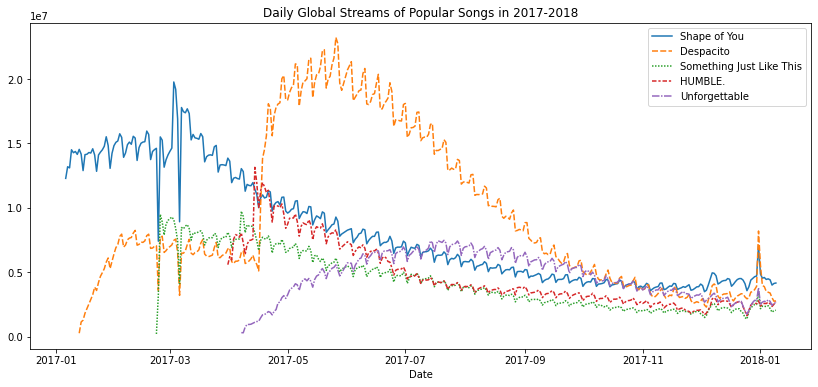

In [3]:
# 도표의 제목 설정
plt.title("Daily Global Streams of Popular Songs in 2017-2018") 

# 선그래프 그리기
sns.lineplot(data=df)

# 실습2: Shape of You, Despacito의 선 그래프 그리기

Text(0.5, 0, 'Date')

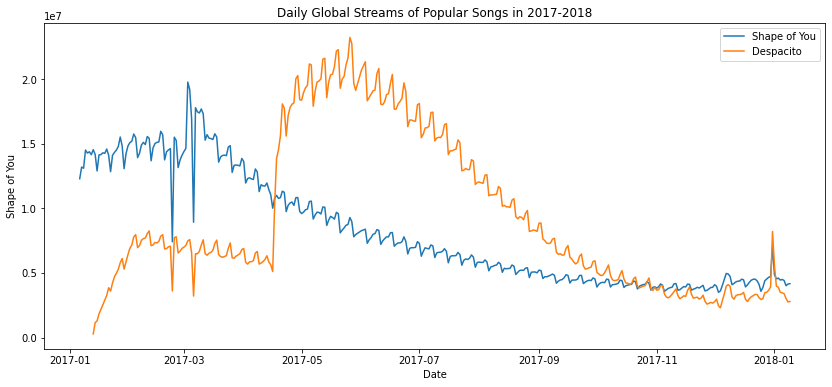

In [4]:
# 도표의 제목 설정
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
# 선그래프 그리기
sns.lineplot(data=df['Shape of You'], label="Shape of You") 
sns.lineplot(data=df['Despacito'], label="Despacito")
plt.xlabel("Date")

# 실습3: Humble, Unforgettable의 선 그래프 그리기

Text(0.5, 0, 'Date')

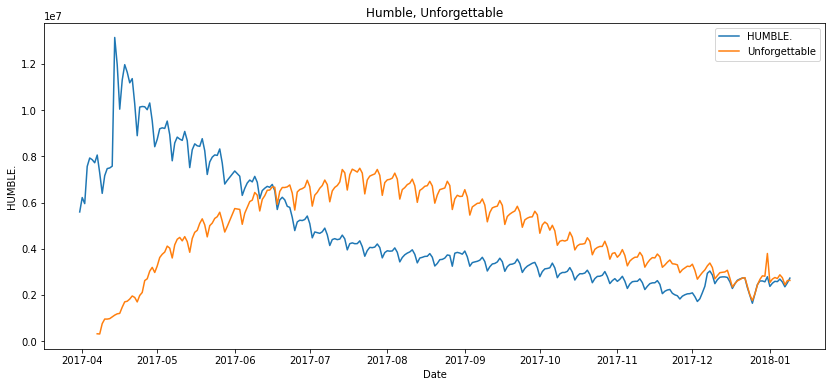

In [5]:
# 도표의 제목 설정
plt.title("Humble, Unforgettable")
# 선그래프 그리기
sns.lineplot(data=df['HUMBLE.'], label="HUMBLE.") 
sns.lineplot(data=df['Unforgettable'], label="Unforgettable")
plt.xlabel("Date")

# 실습4: 인덱스가 날짜가 아닌 경우의 그래프

In [6]:
df.reset_index(inplace=True)
# df.head()

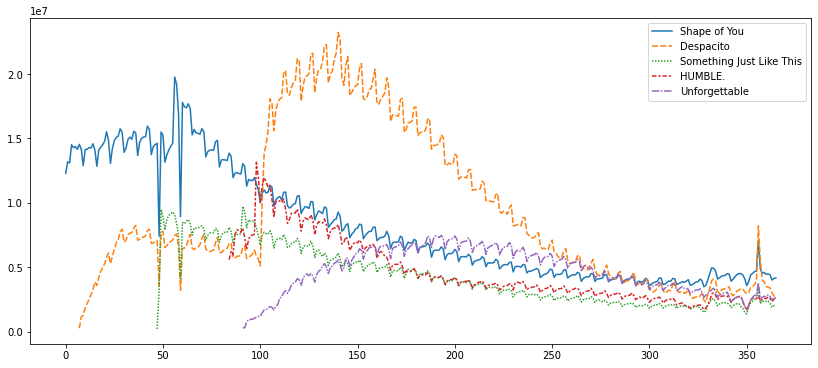

In [7]:
sns.lineplot(data=df) 

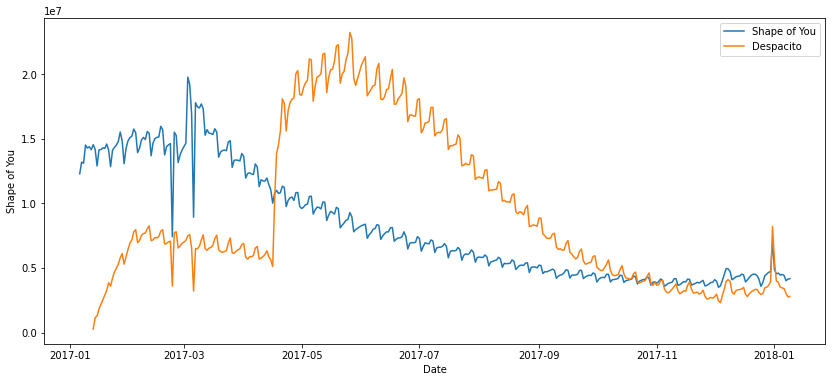

In [8]:
sns.lineplot(data=df, x='Date', y='Shape of You', label = 'Shape of You') 
sns.lineplot(data=df, x='Date', y='Despacito', label = 'Despacito') 

# 실습5: 월별 스트리밍 합계

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [10]:
monthly_df = df.groupby(['Year', 'Month']).sum()

In [11]:
monthly_df.head()

Shape of You    Despacito  Something Just Like This      HUMBLE.  \
Year Month                                                                     
2017 1         366007170   71480567.0                       0.0          0.0   
     2         407227623  202291897.0                47546785.0          0.0   
     3         469111248  204776812.0               245218470.0    5591687.0   
     4         340035736  331026405.0               230799878.0  275145533.0   
     5         269169687  589562035.0               179955790.0  242281099.0   

            Unforgettable  Day  
Year Month                      
2017 1                0.0  481  
     2                0.0  406  
     3                0.0  496  
     4         39663050.0  465  
     5        131442332.0  435

In [12]:
monthly_df.reset_index(inplace=True)

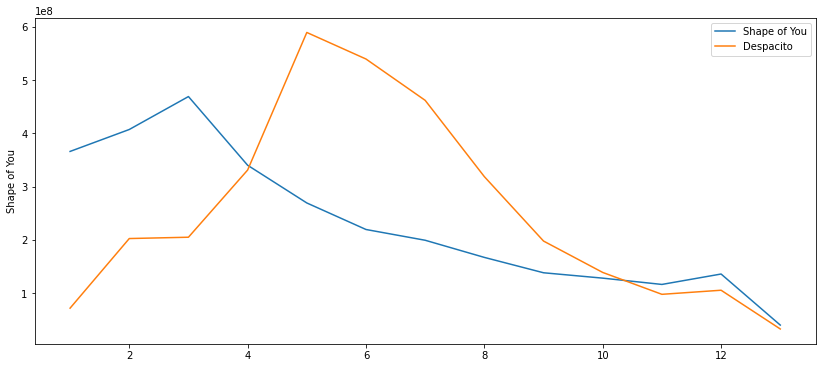

In [13]:
sns.lineplot(x=monthly_df.index+1, y='Shape of You', data= monthly_df, label = 'Shape of You')
sns.lineplot(x=monthly_df.index+1, y='Despacito', data= monthly_df, label = 'Despacito')

## (참고) x축 이름을 위한 컬럼 새로 생성

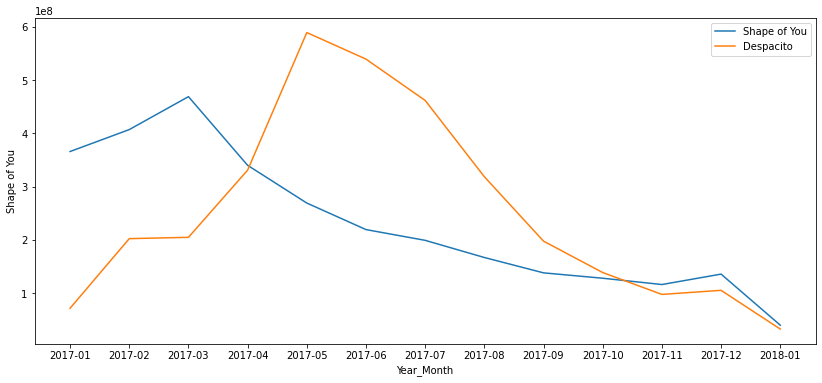

In [14]:
def concat_year_month(date):
    if date.month < 10:
        return "{0}-0{1}".format(date.year, date.month)
    else:
        return "{0}-{1}".format(date.year, date.month)

df["Year_Month"] = df['Date'].apply(concat_year_month)
grouped = df.groupby(["Year_Month"]).sum()

sns.lineplot(x='Year_Month', y='Shape of You', data= grouped, label = 'Shape of You')
sns.lineplot(x='Year_Month', y='Despacito', data= grouped, label = 'Despacito')